In [138]:
import pandas as pd
import json

In [134]:
data_path = 'data_dir/train-test-split-v2.json'

In [2]:
data = pd.read_json(data_path,lines=True)

In [147]:
data.iloc[0]

steam_id                                       76561198046794976
games          [{'appid': 205790, 'name': 'Dota 2 Test', 'pla...
valid_games    [{'appid': 550, 'name': 'Left 4 Dead 2', 'play...
train_games    [{'appid': 205790, 'name': 'Dota 2 Test', 'pla...
user_id                                                        0
Name: 0, dtype: object

# Number of users

In [7]:
num_users = len(data)
num_users

7521

# Number of games

In [10]:
games = set()
for _, user in data.iterrows():
    for g in user['games']:
        games.add(g['name'])
num_games = len(games)
num_games

5400

# Number of Ratings

In [6]:
num_ratings = 0
for _, user in data.iterrows():
    num_ratings += len(user['games'])
num_ratings

1622810

# Sparseness

In [11]:
num_ratings / (num_users * num_games)

0.03995750171125786

# Most played games

In [16]:
from collections import Counter
playtime=Counter()
game_counts = Counter()
for _, user in data.iterrows():
    for g in user['games']:
        playtime[g['name']] += g['playtime_forever']
        game_counts[g['name']] += 1
pd.DataFrame({"playtime": playtime.most_common(10), 'installs': game_counts.most_common(10)})

,playtime,installs
0,"(Counter-Strike: Global Offensive, 401097021)","(Counter-Strike: Global Offensive, 6846)"
1,"(Dota 2, 352996386)","(PAYDAY 2, 4689)"
2,"(Team Fortress 2, 69303185)","(Dota 2 Test, 4673)"
3,"(PLAYERUNKNOWN'S BATTLEGROUNDS, 58904972)","(Left 4 Dead 2, 4638)"
4,"(Rocket League, 42236641)","(Team Fortress 2, 4589)"
5,"(Counter-Strike: Source, 40726125)","(Dota 2, 4549)"
6,"(Garry's Mod, 37362622)","(Garry's Mod, 3949)"
7,"(Rust, 33807746)","(PLAYERUNKNOWN'S BATTLEGROUNDS, 3878)"
8,"(Counter-Strike, 30013780)","(Unturned, 3665)"
9,"(Arma 3, 29001365)","(Portal 2, 3620)"


# Users with most games/ most played

In [101]:
playtime = Counter()
game_counts = Counter()
for _, user in data.iterrows():
    for g in user['games']:
        playtime[user['steam_id']] += g['playtime_forever']
        game_counts[user['steam_id']] += 1
pd.DataFrame({"playtime": playtime.most_common(100), 'installs': game_counts.most_common(100)})

,playtime,installs
0,"(76561198393005712, 24812201)","(76561198047578752, 1402)"
1,"(76561198076423200, 16846021)","(76561198015132768, 1401)"
2,"(76561198447102720, 9514700)","(76561197992345392, 1380)"
3,"(76561198140567424, 8900687)","(76561198000640032, 1379)"
4,"(76561198046329296, 6452274)","(76561198044057984, 1358)"
...,...,...
95,"(76561198000002112, 990775)","(76561197972204496, 1143)"
96,"(76561198048688928, 989346)","(76561198001975504, 1141)"
97,"(76561197964596432, 988705)","(76561197976653392, 1138)"
98,"(76561198025746352, 983251)","(76561197993738272, 1137)"


In [119]:
import seaborn as sns
sns.set()
sns.set_style('white')
%matplotlib inline
import matplotlib.pyplot as plt

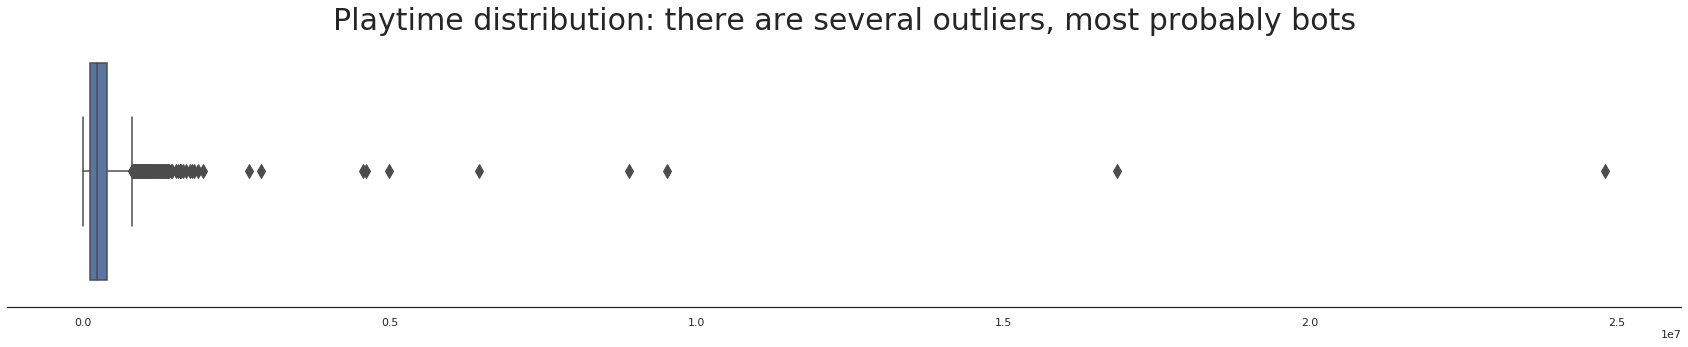

In [128]:
fig, ax = plt.subplots(figsize=(30,5))
sns.despine(fig, left=True)
#sns.distplot(list(playtime.values()))
sns.boxplot(list(playtime.values()), orient='h',fliersize=10);
ax.set_title('Playtime distribution: there are several outliers, most probably bots',size=30);

In [131]:
pd.Series(game_counts).describe()

count    7515.000000
mean      215.942781
std       261.875174
min         2.000000
25%        42.000000
50%       111.000000
75%       281.000000
max      1402.000000
dtype: float64

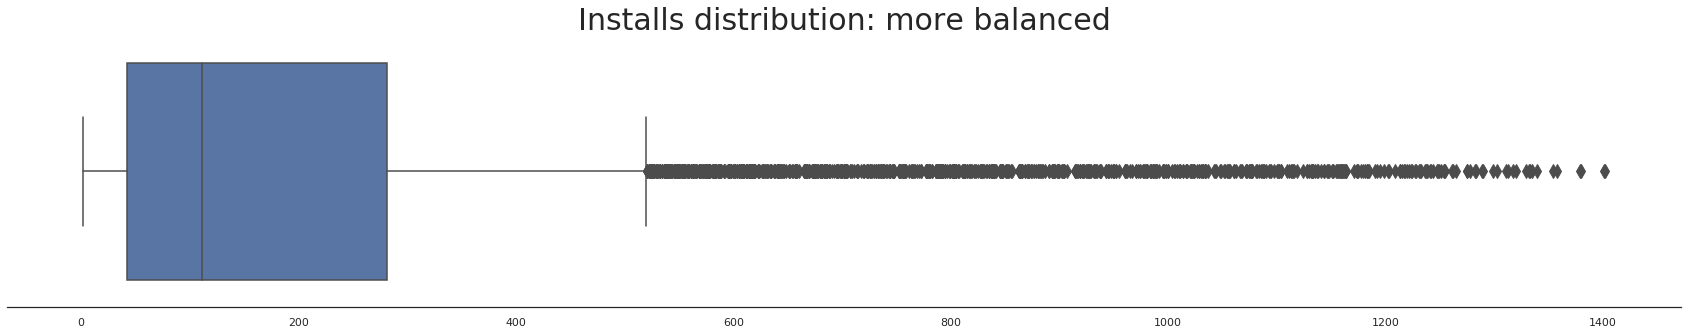

In [133]:
fig, ax = plt.subplots(figsize=(30,5))
sns.despine(fig, left=True)
#sns.distplot(list(playtime.values()))
sns.boxplot(list(game_counts.values()), orient='h', whis=1,fliersize=10);
ax.set_title('Installs distribution: more balanced',size=30);